In [8]:
COMMON_PATH = "../MSAAI_501_Project_FacialEmotionDetection"

DATASET_PATH = fr"{COMMON_PATH}\Dataset"

TRAIN_10_PATH =fr"{COMMON_PATH}\train10"

TRAIN_20_PATH = fr"{COMMON_PATH}\train20"

TRAIN_30_PATH = fr"{COMMON_PATH}\train30"

TRAIN_50_PATH = fr"{COMMON_PATH}\train50"

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(
    data=fr"{DATASET_PATH}\YOLO_format\data.yaml",
    epochs=50,
    imgsz=640,
    device="0" 
)

Models with epoces 10,20,30 and 50 are done in collab

In [9]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

# ============================
# YOUR DATASET PATH
# ============================
ROOT = fr"{DATASET_PATH}\YOLO_format"

TRAIN_IMG_DIR = os.path.join(ROOT, "train", "images")
TRAIN_LABEL_DIR = os.path.join(ROOT, "train", "labels")

VAL_IMG_DIR = os.path.join(ROOT, "valid", "images")
VAL_LABEL_DIR = os.path.join(ROOT, "valid", "labels")

In [10]:
CLASS_NAMES = {
    0: "Anger",
    1: "Contempt",
    2: "Disgust",
    3: "Fear",
    4: "Happy",
    5: "Neutral",
    6: "Sad",
    7: "Surprise"
}

CLASS_NAMES

{0: 'Anger',
 1: 'Contempt',
 2: 'Disgust',
 3: 'Fear',
 4: 'Happy',
 5: 'Neutral',
 6: 'Sad',
 7: 'Surprise'}

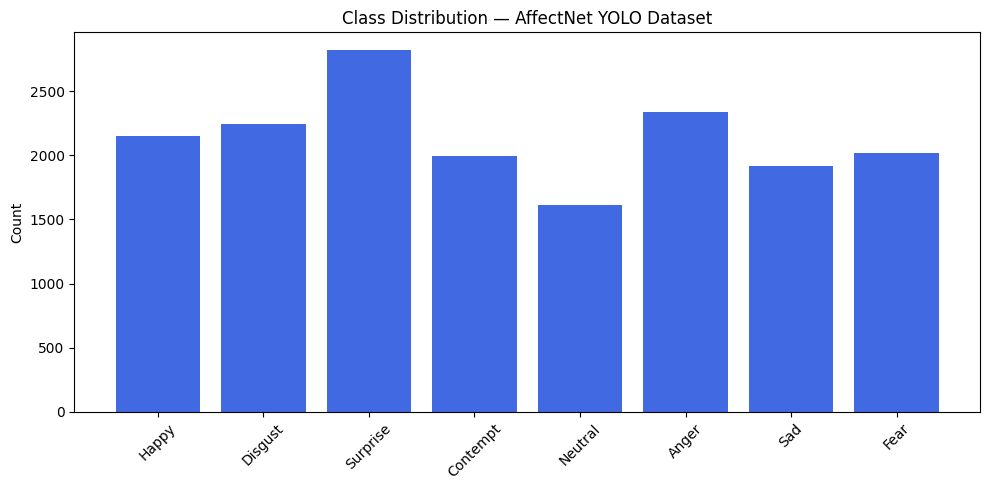

In [11]:
def plot_class_distribution(label_dir=TRAIN_LABEL_DIR):
    counts = Counter()

    for lbl in os.listdir(label_dir):
        if not lbl.endswith(".txt"):
            continue

        with open(os.path.join(label_dir, lbl), "r") as f:
            for line in f:
                cls = int(line.split()[0])
                counts[cls] += 1

    classes = [CLASS_NAMES[c] for c in counts.keys()]
    values = list(counts.values())

    plt.figure(figsize=(10, 5))
    plt.bar(classes, values, color="royalblue")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title("Class Distribution — AffectNet YOLO Dataset")
    plt.tight_layout()
    plt.show()

plot_class_distribution()

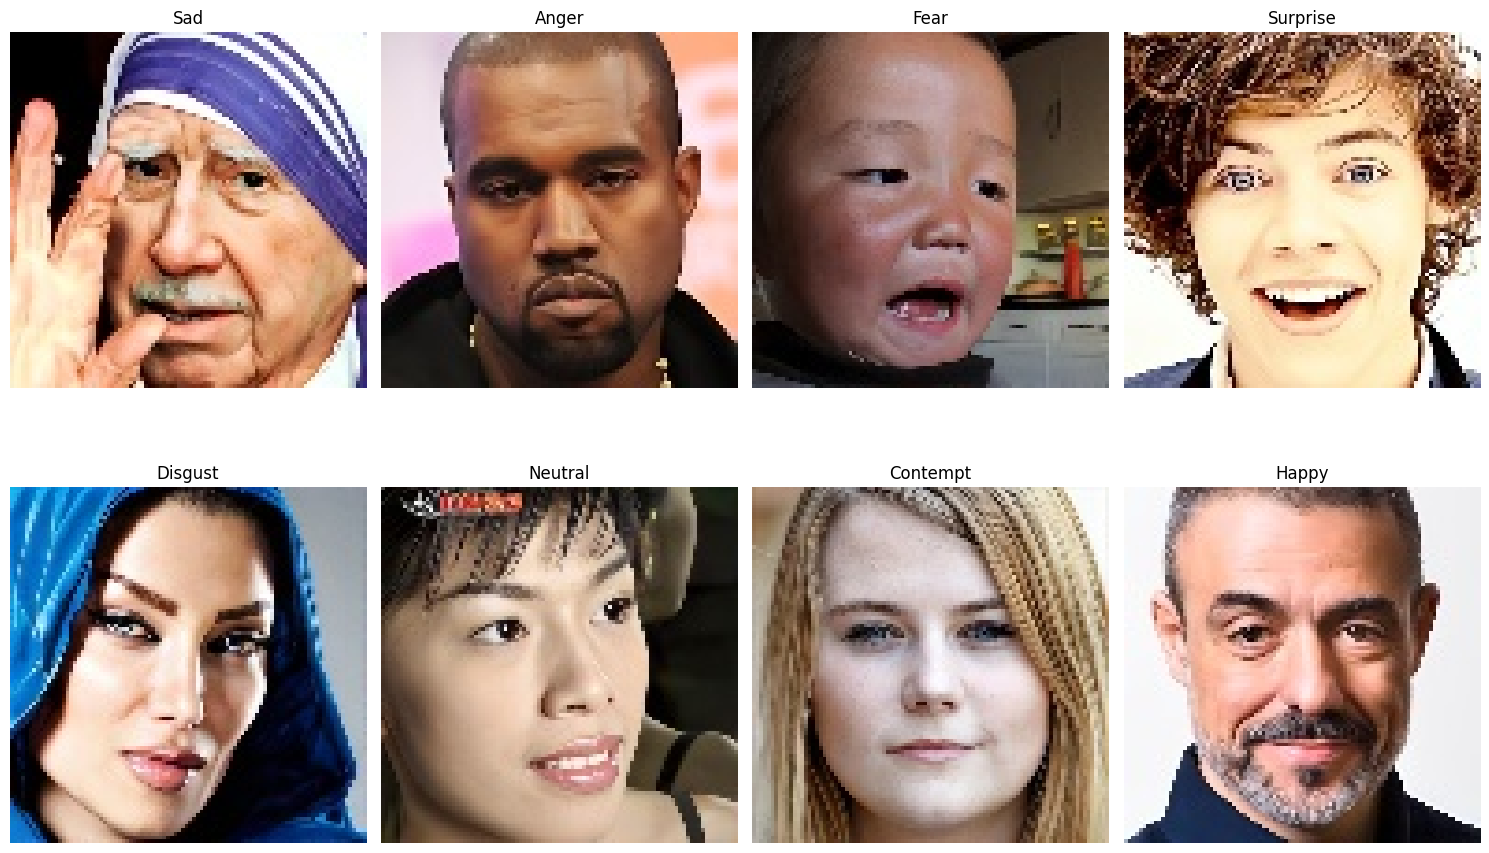

In [12]:
def show_class_gallery(n=1):
    plt.figure(figsize=(15, 10))
    class_to_image = {}

    # Search for first matching image per class
    for img in os.listdir(TRAIN_IMG_DIR):
        lbl = img.replace(".jpg", ".txt")
        lbl_path = os.path.join(TRAIN_LABEL_DIR, lbl)
        if not os.path.exists(lbl_path):
            continue

        with open(lbl_path, "r") as f:
            for line in f.readlines():
                cls = int(line.split()[0])
                if cls not in class_to_image:
                    class_to_image[cls] = img

        if len(class_to_image) == len(CLASS_NAMES):
            break
    
    # Plot gallery
    for i, (cls, img_name) in enumerate(class_to_image.items()):
        img_path = os.path.join(TRAIN_IMG_DIR, img_name)
        displayed = Image.open(img_path)

        plt.subplot(2, 4, i+1)
        plt.imshow(displayed)
        plt.title(CLASS_NAMES[cls])
        plt.axis("off")

    plt.tight_layout()
    plt.show()

show_class_gallery()


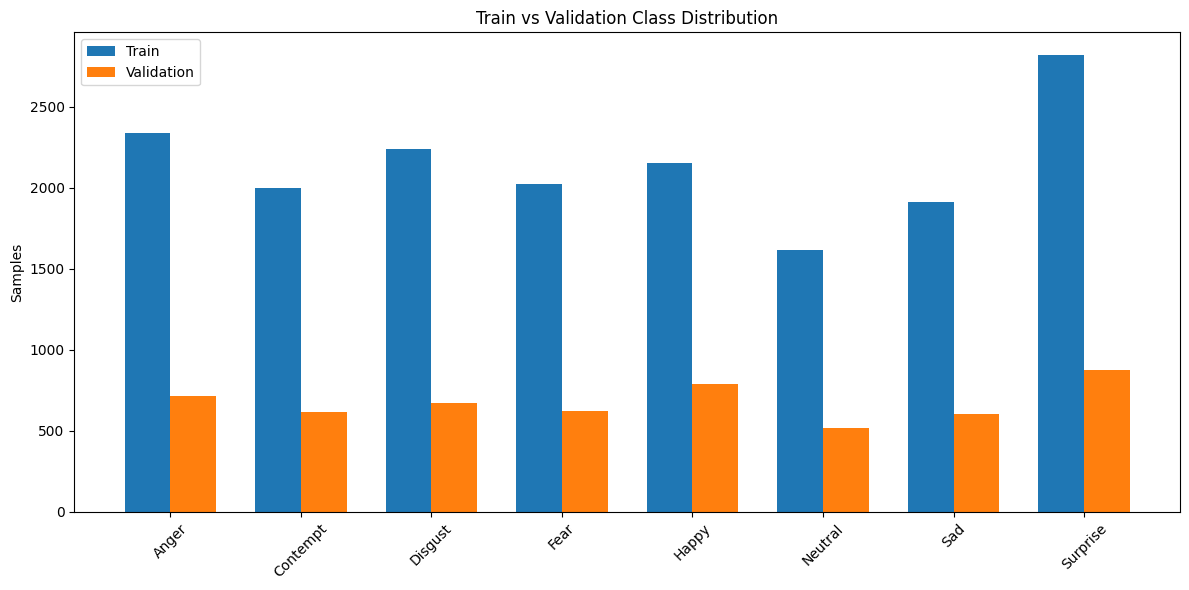

In [13]:
def compare_train_valid():
    def count_classes(label_dir):
        c = Counter()
        for f in os.listdir(label_dir):
            if not f.endswith(".txt"):
                continue
            with open(os.path.join(label_dir, f), "r") as lf:
                for l in lf.readlines():
                    cls = int(l.split()[0])
                    c[cls] += 1
        return c

    train_counts = count_classes(TRAIN_LABEL_DIR)
    val_counts = count_classes(VAL_LABEL_DIR)

    labels = [CLASS_NAMES[i] for i in sorted(train_counts.keys())]

    train_vals = [train_counts[i] for i in sorted(train_counts)]
    val_vals = [val_counts[i] for i in sorted(train_counts)]

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(12,6))
    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, val_vals, width, label='Validation')

    plt.xticks(x, labels, rotation=45)
    plt.ylabel("Samples")
    plt.title("Train vs Validation Class Distribution")
    plt.legend()
    plt.tight_layout()
    plt.show()

compare_train_valid()


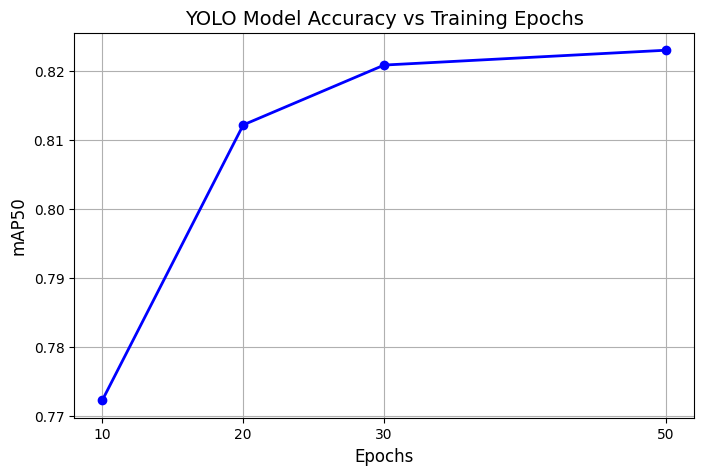

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# --- EDIT THESE PATHS ---
csv_paths = {
    10: fr"{TRAIN_10_PATH}\content\runs\detect\train\results.csv",   
    20: fr"{TRAIN_20_PATH}\content\runs\detect\train\results.csv",
    30: fr"{TRAIN_30_PATH}\content\runs\detect\train\results.csv",
    50: fr"{TRAIN_50_PATH}\content\runs\detect\train\results.csv"
}

accuracy = {}

# Read each CSV and extract the final mAP50 value
for ep, path in csv_paths.items():
    df = pd.read_csv(path)
    accuracy[ep] = df["metrics/mAP50(B)"].iloc[-1]   # last epoch

# Prepare plot data
epochs = list(accuracy.keys())
acc_values = list(accuracy.values())

# Plotting
plt.figure(figsize=(8,5))
plt.plot(epochs, acc_values, marker='o', linewidth=2, color='blue')
plt.title("YOLO Model Accuracy vs Training Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("mAP50", fontsize=12)
plt.grid(True)
plt.xticks(epochs)
plt.show()


Text(0.5, 1.0, 'Training Metrics')

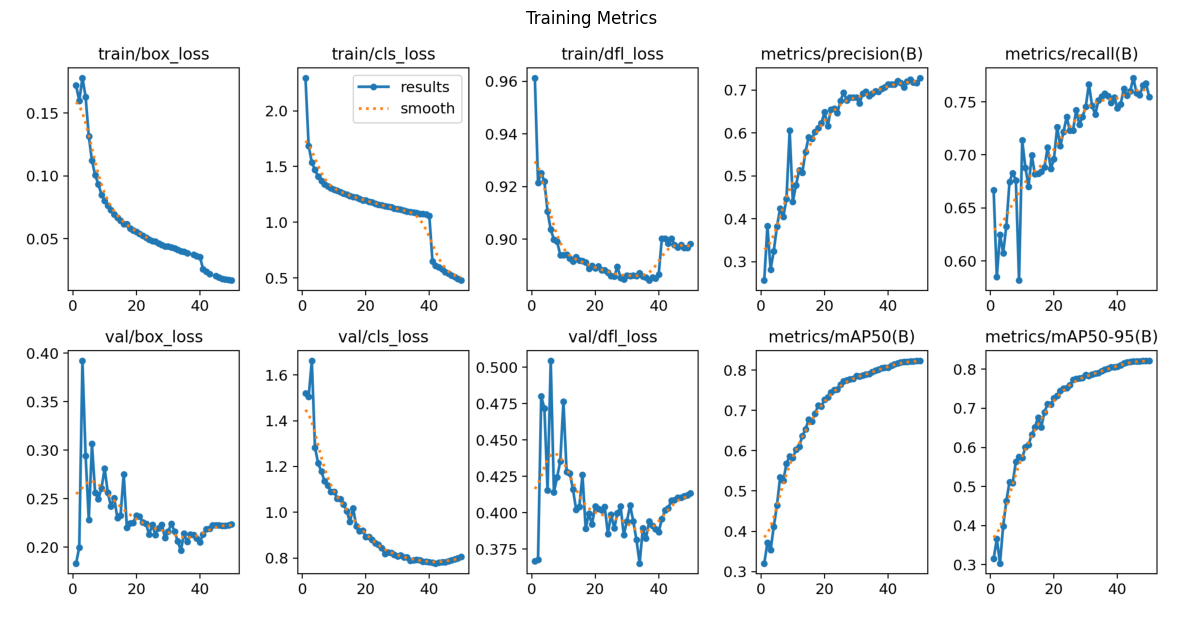

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{TRAIN_50_PATH}\content\runs\detect\train\results.png")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.title("Training Metrics")

Text(0.5, 1.0, 'F1 Confidence Curve')

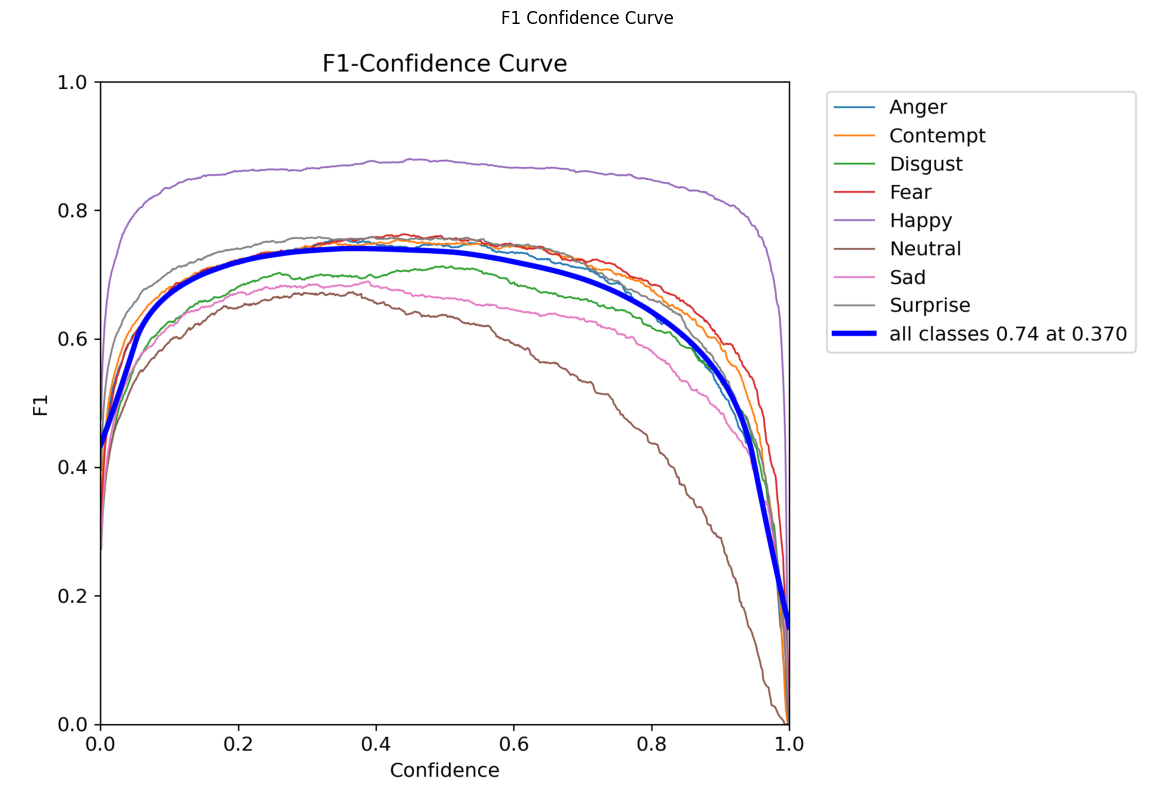

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{TRAIN_50_PATH}\content\runs\detect\train\BoxF1_curve.png")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.title("F1 Confidence Curve")

Text(0.5, 1.0, 'Precision Confidence Curve')

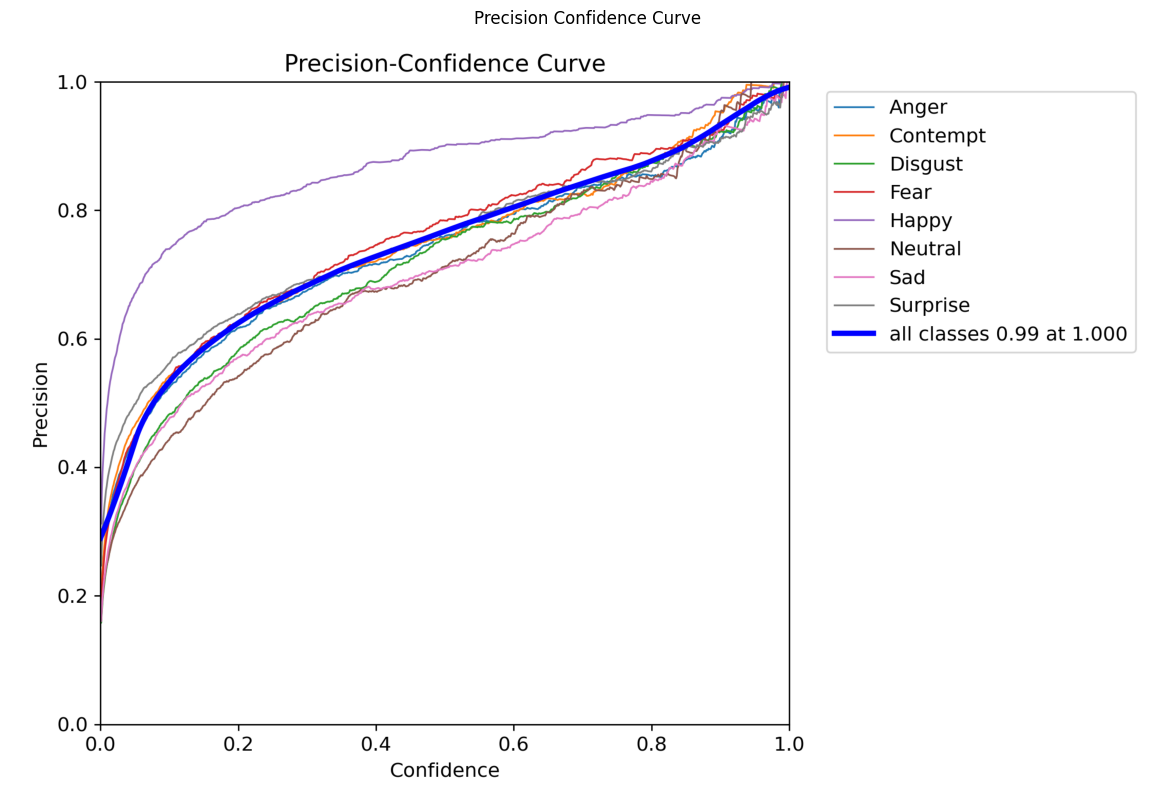

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{TRAIN_50_PATH}\content\runs\detect\train\BoxP_curve.png")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.title("Precision Confidence Curve")

Text(0.5, 1.0, 'Precision Recall Curve')

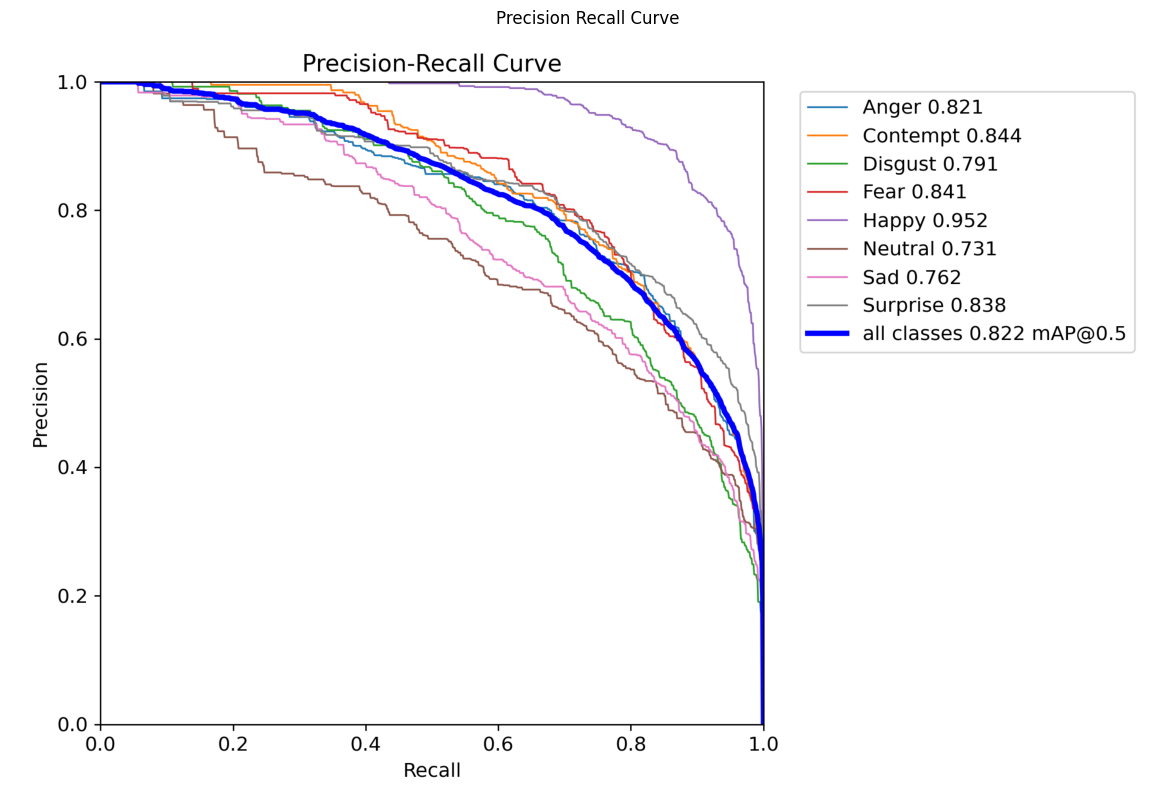

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{TRAIN_50_PATH}\content\runs\detect\train\BoxPR_curve.png")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.title("Precision Recall Curve")

Text(0.5, 1.0, 'Recall Confidence Curve')

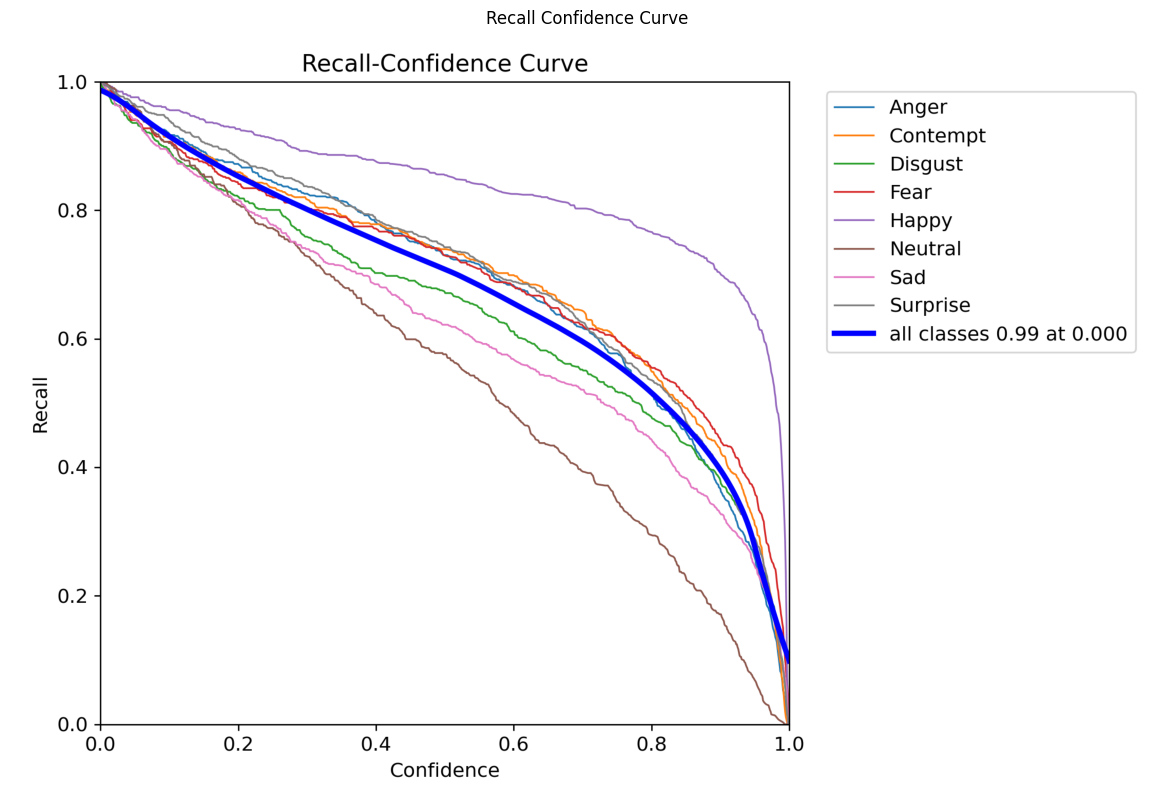

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{TRAIN_50_PATH}\content\runs\detect\train\BoxR_curve.png")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.title("Recall Confidence Curve")

Text(0.5, 1.0, 'Confusion Matrix')

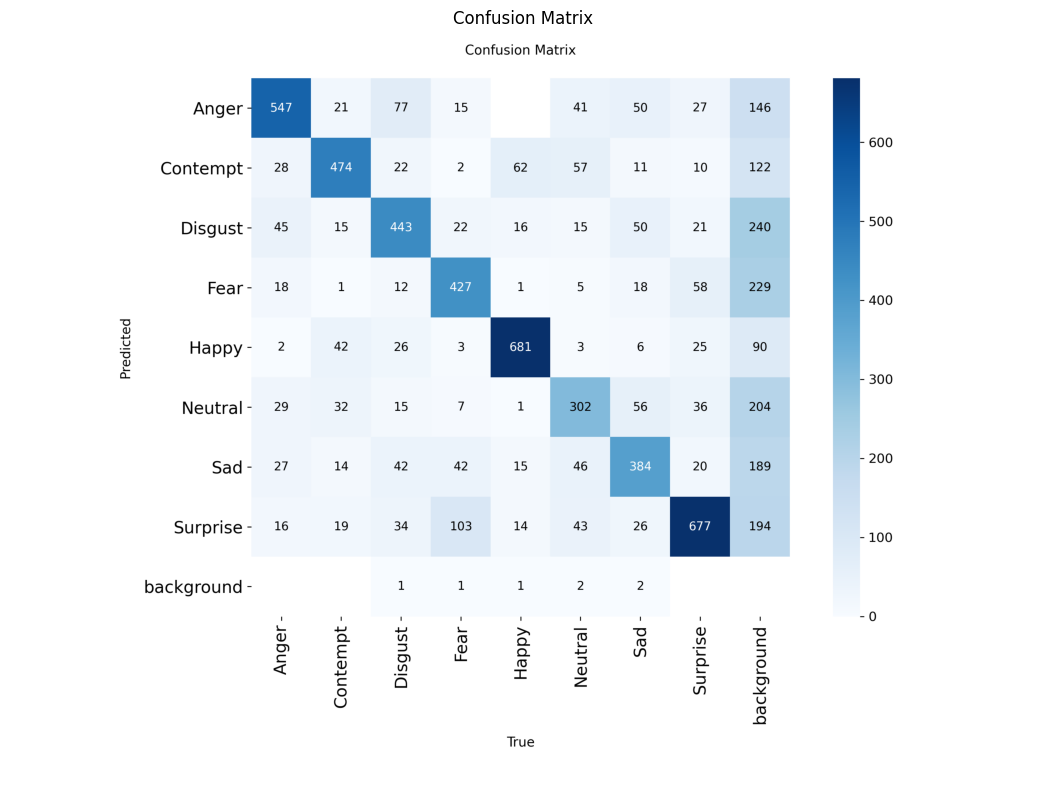

In [20]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{TRAIN_50_PATH}\content\runs\detect\train\confusion_matrix.png")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.title("Confusion Matrix")

In [21]:
def letterbox(img, new_size=640):
    h, w = img.shape[:2]
    scale = new_size / max(h, w)
    nh, nw = int(h * scale), int(w * scale)
    resized = cv2.resize(img, (nw, nh))

    top = (new_size - nh) // 2
    bottom = new_size - nh - top
    left = (new_size - nw) // 2
    right = new_size - nw - left

    padded = cv2.copyMakeBorder(
        resized, top, bottom, left, right,
        cv2.BORDER_CONSTANT, value=(114,114,114)
    )
    return padded

In [23]:
from ultralytics import YOLO
import cv2
import numpy as np
from collections import Counter

# Face detector
face_detector = YOLO("yolov8n-face.pt")

# Emotion model
emotion_model = YOLO(fr"{TRAIN_50_PATH}\content\runs\detect\train\weights\best.pt")

# Image
image_path = fr"{TRAIN_50_PATH}\content\runs\detect\train\val_batch1_labels.jpg"
img = cv2.imread(image_path)

# Detect faces
face_results = face_detector(img, conf=0.3)[0]

emotions = []
person_data = []  # stores (person_id, emotion)

person_id = 1

for box in face_results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    # Crop face
    face_crop = img[y1:y2, x1:x2]
    if face_crop.size == 0:
        continue

    # Letterbox like YOLO training
    face_fixed = letterbox(face_crop, 640)

    # Predict emotion
    emo = emotion_model(face_fixed, conf=0.01, iou=0.2)[0]

    if len(emo.boxes):
        cls = int(emo.boxes.cls[0])
        label = emotion_model.names[cls]
        emotions.append(label)

        person_data.append((person_id, label))

        # Draw on original image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, f"P{person_id}: {label}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

        person_id += 1

# Save image
cv2.imwrite("output_emotions.jpg", img)

# -------------------------------
# PRINT PERSON-WISE EMOTIONS
# -------------------------------
print("========== PERSON WISE EMOTIONS ==========\n")
for pid, emotion in person_data:
    print(f"Person {pid}: {emotion}")

# -------------------------------
# EMOTION DISTRIBUTION SUMMARY
# -------------------------------
print("\n========== OVERALL EMOTION SUMMARY ==========\n")

cnt = Counter(emotions)
total = sum(cnt.values())

for emotion, count in cnt.items():
    percent = (count / total) * 100
    print(f"{emotion}: {percent:.1f}%")

print("\nSaved output image as: output_emotions.jpg")



0: 640x640 16 faces, 6.4ms
Speed: 72.5ms preprocess, 6.4ms inference, 18.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Anger, 7.6ms
Speed: 3.7ms preprocess, 7.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Contempt, 7.5ms
Speed: 3.1ms preprocess, 7.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Happy, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Happy, 8.4ms
Speed: 2.2ms preprocess, 8.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Contempt, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Happy, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Happy, 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640

Text(0.5, 1.0, 'Output Emotions')

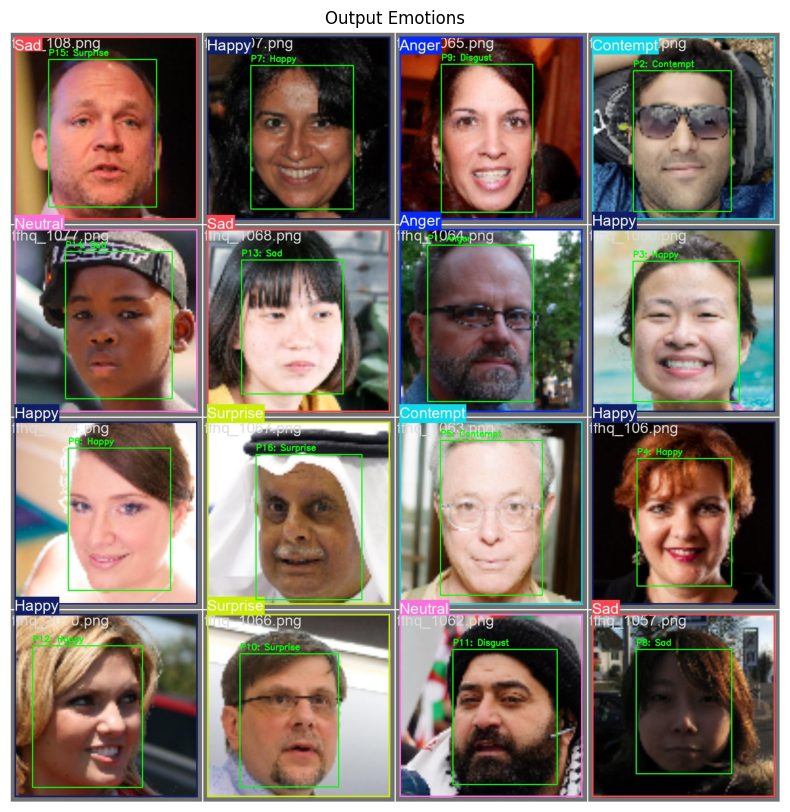

In [24]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(fr"{COMMON_PATH}\output_emotions.jpg")
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.title("Output Emotions")